<a href="https://colab.research.google.com/github/Portfolio-Narisara/Traffy-Fondue-NLP/blob/main/Traffy_Fondue_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2 - Task 2 Labelling Task and Multi-label Classification

###Import คำสั่งที่และ Dataset

In [ ]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 150 #default = 50

In [ ]:
# ---> อ่านชุดข้อมูล Traffy Fondue  จากไฟล์ traffy_assignment_unique.csv
traffy = pd.read_csv('/content/traffy_assignment_unique.csv')
traffy.head()

,running_id,issues,การเดินทาง,กีดขวาง,คนจรจัด,คลอง,ความปลอดภัย,ความสะอาด,จราจร,ต้นไม้,...,ป้ายจราจร,ร้องเรียน,สอบถาม,สะพาน,สัตว์จรจัด,สายไฟ,ห้องน้ำ,เสนอแนะ,เสียงรบกวน,แสงสว่าง
0,1,ทำเรื่องรับสมุดทหารกองหนุน หลังจบแล้วมีให้เสียบเงินกฐิน บอกว่าแล้วแต่จะบริจาค เป็นค่าจดหมายที่ส่งไปแจ้งเตือนแต่ละบ้าน เจ้าหน้าที่บอกว่าเป็นเงินของ...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,ท่อประปาแตกหน้าบ้าน บ้านเลขที่126 ซ.สุขสวัสดิ์27 ซอยเยื้องรพ.ราษฎร์บูรณะ เขตราษฎร์บูรณะค่ะ\n \n ได้แจ้งประปาไปแล้ว 3ครั้งทุกๆวันจันทร์ ประปาบอกรอต...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,ขอแจ้งเหตุถนนเป็นหลุม ที่บริเวณหน้าหมู่บ้าน casa city กัลปพฤกษ์-สาทร รบกวนประสานงานให้เจ้าหน้าที่มาแก้ไขด้วยครับ เกรงว่าจะเกิดอุบัติเหตุ,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,โครงการเพอร์เฟคเพลสพระราม9กรุงเทพกรีฑา ใช้รถน้ำเสียงดังสูบน้ำเน่ารดน้ำต้นไม้ เสียงดังและมีกลิ่นเหม็นเข้ามาในบ้านผู้อยู่อาศัยในเฟส ซึ่งแตกต่างจากด้...,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,5,เคยแจ้งทาง เขตแล้วให้ช่วยเก็บตามบ้าน แต่ละซอย ซึ่งรถใหญ่เข้าไม่ได้ เลยบอกทางเขตต้องเอาคนเดินเก็บใส่ถังขยะที่เป็นรถเข็น ซึ่งทางเขตแจ้งว่า มีพนักงาน...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
'''แยกชุดข้อมูลเป็น issue (เรื่องร้องเรียน) และ tag(หมวดหมู่ของเรื่องร้องเรียน) '''
issue_df = traffy[['issues']]
tags_df = traffy.iloc[:,2:]

In [ ]:
# ---> แสดงข้อมูล issue(เรื่องร้องเรียน) 5 อันดับแรก
issue_df.head()

,issues
0,ทำเรื่องรับสมุดทหารกองหนุน หลังจบแล้วมีให้เสียบเงินกฐิน บอกว่าแล้วแต่จะบริจาค เป็นค่าจดหมายที่ส่งไปแจ้งเตือนแต่ละบ้าน เจ้าหน้าที่บอกว่าเป็นเงินของ...
1,ท่อประปาแตกหน้าบ้าน บ้านเลขที่126 ซ.สุขสวัสดิ์27 ซอยเยื้องรพ.ราษฎร์บูรณะ เขตราษฎร์บูรณะค่ะ\n \n ได้แจ้งประปาไปแล้ว 3ครั้งทุกๆวันจันทร์ ประปาบอกรอต...
2,ขอแจ้งเหตุถนนเป็นหลุม ที่บริเวณหน้าหมู่บ้าน casa city กัลปพฤกษ์-สาทร รบกวนประสานงานให้เจ้าหน้าที่มาแก้ไขด้วยครับ เกรงว่าจะเกิดอุบัติเหตุ
3,โครงการเพอร์เฟคเพลสพระราม9กรุงเทพกรีฑา ใช้รถน้ำเสียงดังสูบน้ำเน่ารดน้ำต้นไม้ เสียงดังและมีกลิ่นเหม็นเข้ามาในบ้านผู้อยู่อาศัยในเฟส ซึ่งแตกต่างจากด้...
4,เคยแจ้งทาง เขตแล้วให้ช่วยเก็บตามบ้าน แต่ละซอย ซึ่งรถใหญ่เข้าไม่ได้ เลยบอกทางเขตต้องเอาคนเดินเก็บใส่ถังขยะที่เป็นรถเข็น ซึ่งทางเขตแจ้งว่า มีพนักงาน...


In [ ]:
# ---> แสดงข้อมูล tag(หมวดหมู่ของเรื่องร้องเรียน) 5 อันดับแรก
tags_df.head()

,การเดินทาง,กีดขวาง,คนจรจัด,คลอง,ความปลอดภัย,ความสะอาด,จราจร,ต้นไม้,ถนน,ทางเท้า,...,ป้ายจราจร,ร้องเรียน,สอบถาม,สะพาน,สัตว์จรจัด,สายไฟ,ห้องน้ำ,เสนอแนะ,เสียงรบกวน,แสงสว่าง
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


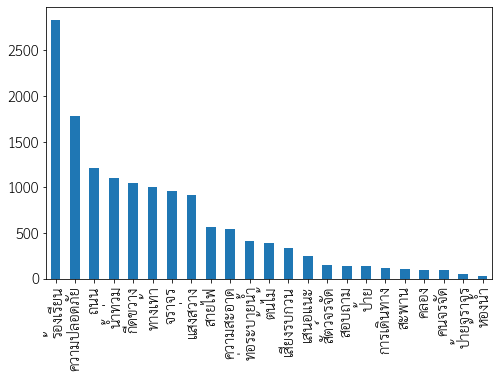

In [ ]:
'''แสดงสัดส่วนของแต่ละ tag(หมวดหมู่ของเรื่องร้องเรียน)'''
# ---> ตั้งค่า font matplotlib ให้รองรับภาษาไทย
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
import matplotlib.pyplot
matplotlib.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
matplotlib.rc('font', family='TH Sarabun Chula')
matplotlib.rcParams.update({'font.size': 22})
import matplotlib.pyplot as plt
# ---> แสดงสัดส่วนเป็น Bar Chart
tags_df.sum().sort_values(ascending=False).plot(kind='bar',figsize=(8, 5))

###จากข้อมูล issue(เรื่องร้องเรียน) ที่แยกมาข้างต้น นำมาทำ Text pre-processing

In [ ]:
# ---> import คำสั่งที่จะใช้
from pythainlp.corpus.common import thai_words
from pythainlp.util import normalize
import re
from pythainlp import Tokenizer
import pythainlp
from pythainlp.corpus import thai_stopwords
from pythainlp import word_tokenize

In [ ]:
# ---> สร้างเป็น function remove__punc เพื่อลบอักษรพิเศษและเครื่องหมายต่างๆ ที่ไม่ต้องการ
def remove_punc(text):

  text = re.sub(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ', text)
  text = re.sub(r'[^กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรลวศษสหฬอฮฤฦะัาำิีึืุูเแโใไๅ็่้๊๋ฯๆฺ์ํ๎ๆ๏๚๛๐฿]', ' ', text)
  text = re.sub(r'#([a-zA-Z0-9ก-๙_]+)', ' ', text)
  text = re.sub('ๆ', ' ', text)
  return text

In [ ]:
# ---> ใช้คำสั่ง apply lambda function remove_punc ใน issue_df['issues'] ข้อมูลเรื่องร้องเรียน
issue_df['issues'] = issue_df['issues'].apply(lambda x: (remove_punc(x)))
# ---> ใช้คำสั่ง apply normalize ไปช่วยแก้ไขคำใน ข้อมูลเรื่องร้องเรียน ที่ผู้ร้องเรียนพิมพ์มาผิด เช่น เกา่ เป็น เก่า
issue_df['issues'] = issue_df['issues'].apply(normalize)
# ---> แสดงตัวอย่างข้อมูล 5 อันดับแรก
issue_df.head()

<ipython-input-11-f646c3dca0ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_df['issues'] = issue_df['issues'].apply(lambda x: (remove_punc(x)))
<ipython-input-11-f646c3dca0ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_df['issues'] = issue_df['issues'].apply(normalize)


,issues
0,ทำเรื่องรับสมุดทหารกองหนุน หลังจบแล้วมีให้เสียบเงินกฐิน บอกว่าแล้วแต่จะบริจาค เป็นค่าจดหมายที่ส่งไปแจ้งเตือนแต่ละบ้าน เจ้าหน้าที่บอกว่าเป็นเงินของ...
1,ท่อประปาแตกหน้าบ้าน บ้านเลขที่ ซ สุขสวัสดิ์ ซอยเยื้องรพ ราษฎร์บูรณะ เขตราษฎร์บูรณะค่ะ ได้แจ้งประปาไปแล้ว ครั้งทุก วันจันทร์ ประปาบอกรอติดต่อกลับ แ...
2,ขอแจ้งเหตุถนนเป็นหลุม ที่บริเวณหน้าหมู่บ้าน กัลปพฤกษ์ สาทร รบกวนประสานงานให้เจ้าหน้าที่มาแก้ไขด้วยครับ เกรงว่าจะเกิดอุบัติเหตุ
3,โครงการเพอร์เฟคเพลสพระราม กรุงเทพกรีฑา ใช้รถน้ำเสียงดังสูบน้ำเน่ารดน้ำต้นไม้ เสียงดังและมีกลิ่นเหม็นเข้ามาในบ้านผู้อยู่อาศัยในเฟส ซึ่งแตกต่างจากด้...
4,เคยแจ้งทาง เขตแล้วให้ช่วยเก็บตามบ้าน แต่ละซอย ซึ่งรถใหญ่เข้าไม่ได้ เลยบอกทางเขตต้องเอาคนเดินเก็บใส่ถังขยะที่เป็นรถเข็น ซึ่งทางเขตแจ้งว่า มีพนักงาน...


In [ ]:
'''เนื่องจาก  PyThaiNLP ฟังก์ชันตัดคำภาษาไทย อาจมีข้อผิดพลาด เช่น คำว่า ท่อประปา ตัดมาเป็น ท่อ,ประ,ปา จึงทำการเพิ่มคำเพื่อให้ถูกต้องมากขึ้น'''
# ---> ใช้คำสั่ง set(thai_words()) เพื่อเพิ่มคำไปใน thai word
words = set(thai_words())

# ---> กำหนด custom list ลงไปใน words เพื่อให้เป็นคำที่ถูกต้องมากขึ้น
new_words = {'ท่อประปา', 'ฝาท่อ', 'รถส่วนตัว', 'บอก', 'เลิศหล้า', 'กีดขวาง', 'จราจร', 'สถานีรถไฟฟ้า', 'ธนาคารกสิกรไทย', 'รถมอเตอร์ไซค์', 'ท่อระบายน้ำ', 'ต้นไม้', 'เสาไฟ', 'ไฟฟ้า', 'เจริญนคร', 'ทางม้าลาย', 'ทางเท้า', 'สวนนวมินทร์ภิรมย์', 'อุบัติเหตุ',
             'เจริญกรุง', 'ทุ่งครุ', 'เจริญรัถ', 'จุดพักรถ', 'ขอบฟุตบาท', 'ฟุตบาท', 'สัญจร', 'ประชาชื่น', 'เตาปูน', 'บริเวณ', 'ไฟส่องสว่าง', 'ตลาดคุ้มเกล้า', 'สวนหลวง', 'รางระบาย', 'ไบเทคบางนา', 'โพธิ์แก้ว', 'สุขุมวิท', 'สายสื่อสาร', 'บางขุนเทียน',
             'สุขสวัสดิ์', 'หัวตะเข้', 'หมอชิต', 'ไทยรามัญ', 'เร่ร่อน', 'แสมดำ', 'การประปานครหลวง', 'ตอหม้อ', 'วัดธาตุทอง', 'สะพานกรุงธน', 'สะพานลอย', 'ริมคลอง', 'รถโดยสาร', 'สาธารณะ', 'จักรยานยนต์', 'ความเสี่ยง', 'โบราณ', 'ลูกระนาด',
             'แก้ไขปัญหา', 'ปากซอย', 'ความเดือดร้อน', 'สำเร็จ', 'ท่อน้ำ', 'ทางแยก', 'ศูนย์สิริกิตติ์', 'รถมอไซด์', 'กาญจนาภิเษก', 'แมวจรจัด', 'จรจัด', 'หมาจรจัด', 'ออเงิน', 'จตุโชติ', 'มีนบุรี', 'แมวจร', 'ดอนเมือง', 'จตุจักร', 'สำเหร่', 'สายไฟ', 'ทางยกระดับ',
             'พหลโยธิน', 'นวิมินทร์', 'อ่อนนุช', 'ประปา', 'เศษอาหาร', 'จรัญสนิทวงศ์', 'พนักงาน', 'สำนักงาน', 'รุงรัง', 'ตลิ่งชัน', 'ไร้บ้าน', 'ยารักษา', 'อุดมสุข', 'น้ำท่วม', 'นครสวรรค์', 'ทำหมัน', 'วงศ์สว่าง', 'ปรีดีย์', 'ไอคอนสยาม', 'วิภาวดี', 'ขุนนาวา',
             'หนองจอก', 'ศาลาว่าการ', 'สุทธิสาร', 'เดอะมอลล์บางแค', 'มอไซต์', 'วัดลำผักชี', 'คนไร้บ้าน', 'รัตนโกสินสมโภช', 'บางเขน', 'ฝาเหล็ก', 'บึงกุ่ม', 'น้ำขัง', 'ศรีรัช', 'เคหะร่มเกล้า', 'นโยบาย', 'ปิ่นเกล้า', 'สาธุประดิษฐ์', 'คนเรร่อน', 'บ้านร้าง',
             'โรงเรียนเตรียมอุดมศึกษาพัฒนาการ', 'อาศัย', 'แบงค์ชาติ', 'ห้าแยกลาดพร้่าว', 'เพขรเกษม', 'พระนคร', 'หัวหมาก', 'ไฟส่อง', 'โชคชัย', 'มอไซต์', 'พระโขนง', 'เฉลิมพระเกียรติ', 'วัดคู้บอน', 'คันนายาว', 'ท่าพระ', 'รถเมล์', 'กรุงเทพกรีฑา', 'รถขยะ'
             'ระแวก', 'ท่อตัน', 'ลุกล้ำ', 'อันตราย', 'ทีมแอดมินกลาง', 'แอดมินกลาง', 'ติดยา', 'มั่่วสุม', 'สะพานควาย', 'สายเคเบิล', 'ฟองดูว์', 'สุวินทวงศ์', 'อุจาระ', 'ราชปรารภ', 'โทรคมนาคม', 'ทองหล่อ', 'คลองกุ่ม', 'หทัยราษฎร์', 'นิติบุคคล', 'รถชน',
             'บาดเจ็บ', 'ทางโค้ง', 'ร้องเรียน', 'สอบถาม', 'ป้ายจราจร', 'ต้นไม้', 'ห้องน้ำ', 'สะพาน', 'สะอาด', 'รบกวน', 'เดินทาง', 'ไฟดับ', 'ไฟเสีย', 'สื่อออนไลน์', 'หน่วยงาน', 'เสนาเฟซ', 'พระรามสี่', 'ผู้คน', 'สวนจตุจักร', 'ฝั่งขาเข้า',
             'ฝั่งขาออก', 'ตึกชาญอิสระ', 'กล้องวงจร', 'สะพานลอย', 'ราษณ์บูรณะ', 'ช่องนนทรี', 'โรงเบียร์เยอรมันตะวันแดง', 'ธนาคารกรุงเทพ', 'ธนาคารกรุงศรีอยุธยา', 'คลองเตย', 'โยธินพัฒนา', 'ถังขยะ', 'กรมโยธา', 'บรมราชชนี', 'รถกระบะ', 'คลองสามวา',
             'ปากท่อ', 'เจ้าคุณทหาร', 'เลียบด่วน', 'สารสาสน์', 'เดอะมอลล์', 'ประดิษฐ์มนูธรรม', 'บรมราชชนนี', 'กรรชัย', 'จตุรทิศ', 'ธนาคารกรุงไทย', 'พระยาสุเรนทร์', 'จอดรถ', 'สมเด็จพระปิ่นเกล้า', 'คนจร', 'สุขาภิบาล', 'น้ำขัง', 'รถสาธารณะ', 'น้ำเสีย',
             'ฝนตก', 'เมืองทอง', 'สวนเบญจกิตติ', 'ทาวอินทาวน์', 'เกาะกลาง', 'โรงเรียน', 'สมุดทหารกองหนุน', 'เจ้าหน้าที่รัฐ'}

words = new_words.union(thai_words())

# ---> ทำการ Tokenization ในข้อมูล issue_df['issues'] และเก็บข้อมูลที่ Tokenization แล้วในคอลัมน์ใหม่คือ tokenize
custom_tokenizer = Tokenizer(words,keep_whitespace=False, engine="longest")
issue_df['tokenize'] = issue_df['issues'].apply(custom_tokenizer.word_tokenize)
# ---> แสดงตัวอย่างข้อมูล 5 อันดับแรก
issue_df.head()

<ipython-input-12-73d3e50feef9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_df['tokenize'] = issue_df['issues'].apply(custom_tokenizer.word_tokenize)


,issues,tokenize
0,ทำเรื่องรับสมุดทหารกองหนุน หลังจบแล้วมีให้เสียบเงินกฐิน บอกว่าแล้วแต่จะบริจาค เป็นค่าจดหมายที่ส่งไปแจ้งเตือนแต่ละบ้าน เจ้าหน้าที่บอกว่าเป็นเงินของ...,"[ทำ, เรื่อง, รับ, สมุดทหารกองหนุน, หลัง, จบ, แล้ว, มี, ให้, เสียบ, เงิน, กฐิน, บอก, ว่าแล้ว, แต่, จะ, บริจาค, เป็น, ค่า, จดหมาย, ที่, ส่ง, ไป, แจ้..."
1,ท่อประปาแตกหน้าบ้าน บ้านเลขที่ ซ สุขสวัสดิ์ ซอยเยื้องรพ ราษฎร์บูรณะ เขตราษฎร์บูรณะค่ะ ได้แจ้งประปาไปแล้ว ครั้งทุก วันจันทร์ ประปาบอกรอติดต่อกลับ แ...,"[ท่อประปา, แตก, หน้าบ้าน, บ้าน, เลข, ที่, ซ, สุขสวัสดิ์, ซอย, เยื้อง, รพ, ราษฎร์, บูรณะ, เขต, ราษฎร์, บูรณะ, ค่ะ, ได้, แจ้ง, ประปา, ไป, แล้ว, ครั้..."
2,ขอแจ้งเหตุถนนเป็นหลุม ที่บริเวณหน้าหมู่บ้าน กัลปพฤกษ์ สาทร รบกวนประสานงานให้เจ้าหน้าที่มาแก้ไขด้วยครับ เกรงว่าจะเกิดอุบัติเหตุ,"[ขอ, แจ้งเหตุ, ถนน, เป็น, หลุม, ที่, บริเวณ, หน้า, หมู่บ้าน, กัลปพฤกษ์, สาทร, รบกวน, ประสานงาน, ให้, เจ้าหน้าที่, มา, แก้ไข, ด้วย, ครับ, เกรง, ว่า..."
3,โครงการเพอร์เฟคเพลสพระราม กรุงเทพกรีฑา ใช้รถน้ำเสียงดังสูบน้ำเน่ารดน้ำต้นไม้ เสียงดังและมีกลิ่นเหม็นเข้ามาในบ้านผู้อยู่อาศัยในเฟส ซึ่งแตกต่างจากด้...,"[โครงการ, เพอร์เฟค, เพลส, พระราม, กรุงเทพกรีฑา, ใช้, รถ, น้ำเสียง, ดัง, สูบน้ำ, เน่า, รดน้ำต้นไม้, เสียงดัง, และ, มี, กลิ่น, เหม็น, เข้ามา, ใน, บ้..."
4,เคยแจ้งทาง เขตแล้วให้ช่วยเก็บตามบ้าน แต่ละซอย ซึ่งรถใหญ่เข้าไม่ได้ เลยบอกทางเขตต้องเอาคนเดินเก็บใส่ถังขยะที่เป็นรถเข็น ซึ่งทางเขตแจ้งว่า มีพนักงาน...,"[เคย, แจ้ง, ทาง, เขต, แล้ว, ให้, ช่วย, เก็บ, ตาม, บ้าน, แต่ละ, ซอย, ซึ่ง, รถ, ใหญ่, เข้า, ไม่, ได้, เลย, บอกทาง, เขต, ต้อง, เอา, คน, เดิน, เก็บ, ใ..."


In [ ]:
''' สร้างเป็น function tokenize_stopwords เพื่อทำการ tokenize และ remove stop words  '''

# ---> ใช้คำสั่ง set(thai_stopwords()) เพื่อลบ thai stop words )
stop_words = set(thai_stopwords())

# ---> กำหนด custom stop word list เพื่อลบคำที่ไม่ต้องการและไม่สื่อความหมายออก
stop_words.update(list(set([
                    'ทำ', 'ว่าแล้ว', 'หน้า', 'ปี', 'บ้าน', 'อยากรู้', 'ไหนจะ', 'ได้ดี', 'ที่จะ','ตอน', 'ขอบคุณ', 'ค่ะ', 'ครับ', 'นะจ๊ะ', 'คะ', 'คับ', 'เวลา', 'บุ', 'หน้ว', 'นที่',
                    'ยง', 'นร' ,'ผม', 'หา', 'ดี', 'อย่างไรบ้าง', 'ลุง', 'เมตร', 'สัน', 'ได้ดี', 'มากขึ้น', 'นิดเดียว', 'ดีกว่า', 'ระ', 'จุด', 'มั่ว', 'เกรง', 'บางคน', 'สวัสดี', 'บอก', 'ล่อน', 'งาย', 'ขอบพระคุุณ'
                    'สี', 'รูป', 'อันนี้', 'แน่ใจ', 'วน', 'วิธีทำ', 'หมู่', 'บ้าน', 'ค์', 'ไซ', 'ด์', 'ผิดก', 'หมาย', 'ท่า', 'แช่', 'แย่มาก', 'แย่', 'ดีมาก', 'เรื่อง', 'เค้า', 'หา', 'ตี', 'ไข', 'แห้', 'เล่น', 'วันที่', 'กค', 'ไม่ต้อง',
                    'ทดสอบ', 'พฤหัส', 'ไข้', 'สำหรับ', 'นว', 'อีกด้วย', 'แจ้ง', 'ตรงนี้', 'ที่จะ', 'น้อง', 'พี่', 'เพื่อน', 'นข', 'เป็นช่วง', 'ข้าว', 'ตามมา', 'ทำการ', 'ทั่วไป', 'รู้', 'ทา', 'เลขที่', 'นาที', 'เดิมที', 'นบุ', 'รี',
                    'ตอบ', 'ทราบ', 'ใกล้', 'ไกล', 'ไกล้', 'ทำต่อ', 'ดีขึ้น', 'จันทร์', 'อังคาร', 'พูธ', 'ศุกร์', 'เสาร์', 'อาทิตย์', 'หรอ', 'เบอร์', 'ใช้เวลา', 'แบบนี้', 'เลิก', 'เสมอ', 'รอบ', 'ปัก', 'สวัด', 'ยังมี',
                    'กลับมา', 'มาจาก', 'ดังนี้', 'ลงมา', 'ปาก', 'เขต', 'ได้เวลา', 'ท่าน', 'ว่าง', 'ด้วยซ้ำ', 'ขอให้', 'เป็นที่เป็นทาง', 'หลายครั้ง', 'ดู', 'สัปดาห์', 'เช้า', 'เดิม', 'ทัก', 'พิกัด', 'แต่กลับ', 'ขนาดที่',
                    'แป้ป', 'ก้อ', 'ก็', 'สู้', 'นะคะ', 'นะค่ะ', 'นะครับ', 'ขอไปที', 'เป็นมา', 'แถว', 'กี่', 'โมง', 'ยาม', 'ใด', 'ขอรับ', 'ใส่', 'หลายครั้ง', 'หนึ่ง', 'สอง', 'สาม', 'สี่', 'ห้า', 'หก', 'เจ็ด', 'แปด', 'เก้า', 'สิบ',
                    'ซึ่ง', 'ตัวเอง', 'ชั่วโมง', 'เหรอ', 'กทม', 'เจอ', 'ขอให้', 'อยู่ดี', 'ตอนนี้', 'ซอย', 'ช่วงต้น', 'เหมือนเดิม', 'เดือน', 'ที่แจ้ง', 'แล้วด้วย', 'แถม', 'อย่า', 'ต่อไป', 'การนำ', 'อีกแล้ว', 'สักที', 'เมื่อไหร่', 'ขนาด', 'ติด',
                    'เลข', 'นท', 'ร์', 'แยก', 'งาน', 'บริเวณ', 'ปัญหา', 'ปากซอย', 'เป็นอื่น', 'เป็นเวลา', 'ยังอยู่', 'จำนวน', 'คาด', 'ไปมา', 'แล้วก็', 'สุดท้าย', 'เป็นเรื่อง', 'หนู', 'อีกที', 'ภาพ', 'โดยเฉพาะ', 'อยู่แล้ว', 'ก่อนอื่น', 'หมู่บ้าน',
                    'ฝั่ง', 'เข้ามา', 'ร้าน', 'เข้าออก', 'จำนวนมาก', 'เรียบร้อย', 'ดำเนินการ', 'แขวง', 'เส้น', 'คัน', 'เต็ม', 'ฝาก', 'ตัว', 'วัด', 'วิ่ง', 'สุขุมวิท', 'หนัก', 'รอ', 'ออกมา', 'ลาดพร้าว', 'รามคำแหง', 'โดน', 'วาง', 'กลาง',
                    'ชอบ', 'โรงเรียน', 'ทำให้เกิด', 'ตลาด', 'หน้าบ้าน', 'สน', 'ขับ', 'ต้น', 'ลด', 'รามอินทรา', 'เหมือน', 'ประชาชน', 'ต้องการ', 'พัฒนาการ', 'ขาว', 'กองเท', 'นึง', 'ติดกับ', 'หยุด', 'ดวง', 'นึง', 'เท'
                    'ก่อให้เกิด' , 'สี', 'ช่วงเวลา', 'ชัย', 'พระ', 'ขวา', 'เรียน', 'แนว', 'เลียบ', 'แดง', 'หลัก', 'ที่อยู่', 'ลึก', 'รพ', 'ร้านค้า', 'หยุด', 'กรุงเทพมหานคร', 'เข้าไป', 'ใช้งาน', 'ประชา', 'ลาดกระบัง', 'ปกติ', 'ระดับ',
                    'เอก', 'รร', 'บริษัท', 'จร', 'เร่ง', 'กวดขัน', 'รีบ', 'รา', 'ไซต์', 'มอ', 'นักเรียน', 'อง', 'ดินแดง', 'ลำ', 'ถาวร', 'หัว', 'ซื้อ', 'ถ่าย', 'ยืน', 'ไทย', 'หิน', 'โทร', 'เงิน', 'ถ่าย', 'ห้าง', 'ปลูก', 'เมือง',
                    'ฟุต', 'ดูแล', 'ตก', 'พหลโยธิน', 'เด็ก', 'เย็น', 'เจริญ', 'อ่อนนุช', 'ทอง', 'สภาพ', 'มุ่งหน้า', 'มีทาง', 'เป็นประจำ', 'เพชรเกษม', 'นวมินทร์', 'ประเวศ', 'ตำแหน่ง', 'กอง', 'ผู้ใช้', 'คอนโด', 'ออกจาก', 'ริม',
                    'พระราม', 'สุขุมวิท', 'อุดมสุข', 'ซ้าย', 'ลอก', 'บัง', 'ที่มา', 'ศรีนครินทร์', 'โครงการ', 'สิน', 'ดอนเมือง', 'ตรวจ', 'เกี่ยว', 'แรง', 'ขาเข้า', 'ช่อง', 'กรุงเทพ', 'ครึ่ง', 'ต่ำ', 'เท', 'สถานที่', 'คืน', 'รัชดา', 'ตกลง',
                    'สถานี', 'ประ', 'ล้น', 'ท้าย', 'สถานี', 'ประ', 'ล้น', 'ท้าย', 'ลดลง', 'ตู้', 'ยา', 'ป้อม', 'วิ', 'พระโขนง', 'มีนบุรี', 'พญาไท', 'ราม', 'แห้ง', 'จรัญสนิทวงศ์', 'ราษฎร์', 'เป็นอย่างมาก', 'วิภาวดี',
                    'ทั้งวัน', 'คลองเตย', 'หนอง', 'ผู้คน', 'ขา', 'เพชรบุรี', 'คลองสามวา', 'ศรี', 'ทุ่ม', 'บางเขน', 'ทุกครั้งที่', 'สาทร', 'ชัชชาติ', 'บางแค', 'ประจำ', 'ขนาดใหญ่', 'บางนา', 'ระบบ', 'สายไหม', 'ผู้ว่า', 'เหยียบ',
                    'คอย', 'ตอนเช้า', 'ที่ผ่านมา', 'ร่มเกล้า', 'กาญจนาภิเษก', 'ใกล้เคียง', 'มาถึง', 'กม', 'ขน', 'เป็นพื้น', 'คนใช้', 'เอกมัย', 'กลายเป็น', 'นานา', 'อา', 'สัก', 'ฟ้า', 'สนใจ', 'ลาด', 'ยืน', 'กิน', 'บอน', 'ชัดเจน', 'ค่า',
                    'ซื่อ', 'เครื่อง', 'บางขุนเทียน', 'พาด', 'งั้น', 'แน่นอน', 'ด้านหน้า', 'แตกต่าง'
                      ])))
''' สร้างเป็น function stopwords เพื่อทำการ tokenize และ remove stop words  '''
def stopwords(text):

    filtered_text = []  # สร้าง list ว่าง เพื่อเก็บ text หลังจากลบ stop words

    for w in text:
      if w not in stop_words: # ถ้าคำไหนไม่ได้อยู่ใน stop words ให้เก็บไว้ใน list filtered_text
        filtered_text.append(w)

    return (filtered_text)  # join list

In [ ]:
# ---> ใช้คำสั่ง apply lambda stopwords ใน issue_df['tokenize'] ข้อมูลเรื่องร้องเรียน และแสดงตัวอย่างข้อมูล 10 อันดับแรก
issue_df['stop_words'] = issue_df['tokenize'].apply(lambda x: stopwords(x))
issue_df.head(10)

<ipython-input-14-f1e589408184>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_df['stop_words'] = issue_df['tokenize'].apply(lambda x: stopwords(x))


,issues,tokenize,stop_words
0,ทำเรื่องรับสมุดทหารกองหนุน หลังจบแล้วมีให้เสียบเงินกฐิน บอกว่าแล้วแต่จะบริจาค เป็นค่าจดหมายที่ส่งไปแจ้งเตือนแต่ละบ้าน เจ้าหน้าที่บอกว่าเป็นเงินของ...,"[ทำ, เรื่อง, รับ, สมุดทหารกองหนุน, หลัง, จบ, แล้ว, มี, ให้, เสียบ, เงิน, กฐิน, บอก, ว่าแล้ว, แต่, จะ, บริจาค, เป็น, ค่า, จดหมาย, ที่, ส่ง, ไป, แจ้...","[สมุดทหารกองหนุน, จบ, เสียบ, กฐิน, บริจาค, จดหมาย, เตือน, เจ้าหน้าที่, รัฐ, เจ้าหน้าที่, ขาดทุน, อาศัย, แรงกดดัน, งบ, จดหมาย, บริจาค, ทำบุญ, จดหมา..."
1,ท่อประปาแตกหน้าบ้าน บ้านเลขที่ ซ สุขสวัสดิ์ ซอยเยื้องรพ ราษฎร์บูรณะ เขตราษฎร์บูรณะค่ะ ได้แจ้งประปาไปแล้ว ครั้งทุก วันจันทร์ ประปาบอกรอติดต่อกลับ แ...,"[ท่อประปา, แตก, หน้าบ้าน, บ้าน, เลข, ที่, ซ, สุขสวัสดิ์, ซอย, เยื้อง, รพ, ราษฎร์, บูรณะ, เขต, ราษฎร์, บูรณะ, ค่ะ, ได้, แจ้ง, ประปา, ไป, แล้ว, ครั้...","[ท่อประปา, แตก, ซ, สุขสวัสดิ์, เยื้อง, บูรณะ, บูรณะ, ประปา, ประปา, ติดต่อ, เงียบหาย]"
2,ขอแจ้งเหตุถนนเป็นหลุม ที่บริเวณหน้าหมู่บ้าน กัลปพฤกษ์ สาทร รบกวนประสานงานให้เจ้าหน้าที่มาแก้ไขด้วยครับ เกรงว่าจะเกิดอุบัติเหตุ,"[ขอ, แจ้งเหตุ, ถนน, เป็น, หลุม, ที่, บริเวณ, หน้า, หมู่บ้าน, กัลปพฤกษ์, สาทร, รบกวน, ประสานงาน, ให้, เจ้าหน้าที่, มา, แก้ไข, ด้วย, ครับ, เกรง, ว่า...","[แจ้งเหตุ, ถนน, หลุม, กัลปพฤกษ์, รบกวน, ประสานงาน, เจ้าหน้าที่, อุบัติเหตุ]"
3,โครงการเพอร์เฟคเพลสพระราม กรุงเทพกรีฑา ใช้รถน้ำเสียงดังสูบน้ำเน่ารดน้ำต้นไม้ เสียงดังและมีกลิ่นเหม็นเข้ามาในบ้านผู้อยู่อาศัยในเฟส ซึ่งแตกต่างจากด้...,"[โครงการ, เพอร์เฟค, เพลส, พระราม, กรุงเทพกรีฑา, ใช้, รถ, น้ำเสียง, ดัง, สูบน้ำ, เน่า, รดน้ำต้นไม้, เสียงดัง, และ, มี, กลิ่น, เหม็น, เข้ามา, ใน, บ้...","[เพอร์เฟค, เพลส, กรุงเทพกรีฑา, รถ, น้ำเสียง, สูบน้ำ, เน่า, รดน้ำต้นไม้, เสียงดัง, กลิ่น, เหม็น, ผู้อยู่อาศัย, เฟส, น้ำสะอาด, กลิ่น, เหม็น, มีเสียง..."
4,เคยแจ้งทาง เขตแล้วให้ช่วยเก็บตามบ้าน แต่ละซอย ซึ่งรถใหญ่เข้าไม่ได้ เลยบอกทางเขตต้องเอาคนเดินเก็บใส่ถังขยะที่เป็นรถเข็น ซึ่งทางเขตแจ้งว่า มีพนักงาน...,"[เคย, แจ้ง, ทาง, เขต, แล้ว, ให้, ช่วย, เก็บ, ตาม, บ้าน, แต่ละ, ซอย, ซึ่ง, รถ, ใหญ่, เข้า, ไม่, ได้, เลย, บอกทาง, เขต, ต้อง, เอา, คน, เดิน, เก็บ, ใ...","[รถ, บอกทาง, คน, เดิน, ถังขยะ, รถเข็น, พนักงาน]"
5,ซอยเพชรเกษม แยก กลางซอยข้างท่อระบายน้ำมีหลุมและรอยแตก เด็กเล็กในซอยวิ่งไปมาตลอด มีวิ่งสะดุดล้มบาดเจ็บบ้าง อยากให้เขตช่วยดูแลหน่อยจ้า,"[ซอย, เพชรเกษม, แยก, กลาง, ซอย, ข้าง, ท่อระบายน้ำ, มี, หลุม, และ, รอยแตก, เด็กเล็ก, ใน, ซอย, วิ่ง, ไปมา, ตลอด, มี, วิ่ง, สะดุด, ล้ม, บาดเจ็บ, บ้าง...","[ท่อระบายน้ำ, หลุม, รอยแตก, เด็กเล็ก, สะดุด, ล้ม, บาดเจ็บ, ช่วยดูแล]"
6,ไม่พอใจการชี้แจงของฝ่ายโยธา เขตคลองสามวา รวมถึงสำนักการโยธา กทม เรื่องสาเหตุที่ไม่สามารถก่อสร้างสะพานลอยได้ เนื่องจากว่า หน้าสำนักงานเขตมีนบุรี ฟุ...,"[ไม่, พอใจ, การชี้แจง, ของ, ฝ่าย, โยธา, เขต, คลองสามวา, รวมถึง, สำนัก, การ, โยธา, กทม, เรื่อง, สาเหตุ, ที่, ไม่, สามารถ, ก่อสร้าง, สะพานลอย, ได้, ...","[พอใจ, การชี้แจง, โยธา, สำนัก, โยธา, สาเหตุ, ก่อสร้าง, สะพานลอย, เนื่องจากว่า, สำนักงานเขต, ฟุตบาท, แคบ, ก่อสร้าง, สะพานลอย, ถนน, คู้, ถนน, คลอง, ..."
7,ไฟที่เสาไฟฟ้าไม่ติดนานแล้ว เคยแจ้งทางเขตแล้ว แต่ไม่ได้รับการแก้ไข,"[ไฟ, ที่, เสาไฟฟ้า, ไม่, ติด, นาน, แล้ว, เคย, แจ้ง, ทาง, เขต, แล้ว, แต่, ไม่, ได้รับ, การ, แก้ไข]","[ไฟ, เสาไฟฟ้า]"
8,มีการจอดรถในบริเวณที่ห้ามจอด ขาว แดง ปากซอยเพชรเกษม และ และไม่สามารถแก้ปัญหาได้อย่างแท้จริง,"[มี, การ, จอดรถ, ใน, บริเวณ, ที่, ห้าม, จอด, ขาว, แดง, ปากซอย, เพชรเกษม, และ, และ, ไม่, สามารถ, แก้ปัญหา, ได้, อย่าง, แท้จริง]","[จอดรถ, ห้าม, จอด, แก้ปัญหา]"
9,เทศกิจปล่อยให้กลับมาขายของเหมือนเดิม รถมอเตอร์ไซค์จอดบนถนน,"[เทศกิจ, ปล่อย, ให้, กลับมา, ขายของ, เหมือนเดิม, รถมอเตอร์ไซค์, จอด, บน, ถนน]","[เทศกิจ, ปล่อย, ขายของ, รถมอเตอร์ไซค์, จอด, ถนน]"


In [ ]:
# ---> ใช้คำสั่ง apply lambda เลือกเฉพาะคำที่มีความยาวมากกว่า 1
issue_df['stop_words'] = issue_df['stop_words'].apply(lambda x: [item for item in x if len(item) > 1])

# ---> ใช้คำสั่ง apply lambda ในการหาคำที่ไม่ซ้ำของ list ใน issue_df['stop_words']
issue_df['stop_words'] = issue_df['stop_words'].apply(lambda x: list(pd.unique(x)))

# --->แสดงตัวอย่างข้อมูล 10 อันดับแรก
issue_df.head()

<ipython-input-96-d6a17229749d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_df['stop_words'] = issue_df['stop_words'].apply(lambda x: [item for item in x if len(item) > 1])
<ipython-input-96-d6a17229749d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_df['stop_words'] = issue_df['stop_words'].apply(lambda x: list(pd.unique(x)))


,issues,tokenize,stop_words
0,ทำเรื่องรับสมุดทหารกองหนุน หลังจบแล้วมีให้เสียบเงินกฐิน บอกว่าแล้วแต่จะบริจาค เป็นค่าจดหมายที่ส่งไปแจ้งเตือนแต่ละบ้าน เจ้าหน้าที่บอกว่าเป็นเงินของ...,"[ทำ, เรื่อง, รับ, สมุดทหารกองหนุน, หลัง, จบ, แล้ว, มี, ให้, เสียบ, เงิน, กฐิน, บอก, ว่าแล้ว, แต่, จะ, บริจาค, เป็น, ค่า, จดหมาย, ที่, ส่ง, ไป, แจ้...","[สมุดทหารกองหนุน, จบ, เสียบ, กฐิน, บริจาค, จดหมาย, เตือน, เจ้าหน้าที่, รัฐ, ขาดทุน, อาศัย, แรงกดดัน, งบ, ทำบุญ, บัญชี, ศัทธา]"
1,ท่อประปาแตกหน้าบ้าน บ้านเลขที่ ซ สุขสวัสดิ์ ซอยเยื้องรพ ราษฎร์บูรณะ เขตราษฎร์บูรณะค่ะ ได้แจ้งประปาไปแล้ว ครั้งทุก วันจันทร์ ประปาบอกรอติดต่อกลับ แ...,"[ท่อประปา, แตก, หน้าบ้าน, บ้าน, เลข, ที่, ซ, สุขสวัสดิ์, ซอย, เยื้อง, รพ, ราษฎร์, บูรณะ, เขต, ราษฎร์, บูรณะ, ค่ะ, ได้, แจ้ง, ประปา, ไป, แล้ว, ครั้...","[ท่อประปา, แตก, สุขสวัสดิ์, เยื้อง, บูรณะ, ประปา, ติดต่อ, เงียบหาย]"
2,ขอแจ้งเหตุถนนเป็นหลุม ที่บริเวณหน้าหมู่บ้าน กัลปพฤกษ์ สาทร รบกวนประสานงานให้เจ้าหน้าที่มาแก้ไขด้วยครับ เกรงว่าจะเกิดอุบัติเหตุ,"[ขอ, แจ้งเหตุ, ถนน, เป็น, หลุม, ที่, บริเวณ, หน้า, หมู่บ้าน, กัลปพฤกษ์, สาทร, รบกวน, ประสานงาน, ให้, เจ้าหน้าที่, มา, แก้ไข, ด้วย, ครับ, เกรง, ว่า...","[แจ้งเหตุ, ถนน, หลุม, กัลปพฤกษ์, รบกวน, ประสานงาน, เจ้าหน้าที่, อุบัติเหตุ]"
3,โครงการเพอร์เฟคเพลสพระราม กรุงเทพกรีฑา ใช้รถน้ำเสียงดังสูบน้ำเน่ารดน้ำต้นไม้ เสียงดังและมีกลิ่นเหม็นเข้ามาในบ้านผู้อยู่อาศัยในเฟส ซึ่งแตกต่างจากด้...,"[โครงการ, เพอร์เฟค, เพลส, พระราม, กรุงเทพกรีฑา, ใช้, รถ, น้ำเสียง, ดัง, สูบน้ำ, เน่า, รดน้ำต้นไม้, เสียงดัง, และ, มี, กลิ่น, เหม็น, เข้ามา, ใน, บ้...","[เพอร์เฟค, เพลส, กรุงเทพกรีฑา, รถ, น้ำเสียง, สูบน้ำ, เน่า, รดน้ำต้นไม้, เสียงดัง, กลิ่น, เหม็น, ผู้อยู่อาศัย, เฟส, น้ำสะอาด, มีเสียง, รบกวน, ความส..."
4,เคยแจ้งทาง เขตแล้วให้ช่วยเก็บตามบ้าน แต่ละซอย ซึ่งรถใหญ่เข้าไม่ได้ เลยบอกทางเขตต้องเอาคนเดินเก็บใส่ถังขยะที่เป็นรถเข็น ซึ่งทางเขตแจ้งว่า มีพนักงาน...,"[เคย, แจ้ง, ทาง, เขต, แล้ว, ให้, ช่วย, เก็บ, ตาม, บ้าน, แต่ละ, ซอย, ซึ่ง, รถ, ใหญ่, เข้า, ไม่, ได้, เลย, บอกทาง, เขต, ต้อง, เอา, คน, เดิน, เก็บ, ใ...","[รถ, บอกทาง, คน, เดิน, ถังขยะ, รถเข็น, พนักงาน]"


In [ ]:
''' แสดงคำที่พบบ่อยใน issue_df['stop_words'] 10 อันดับแรก'''
from collections import Counter
cnt = Counter()
for text in issue_df['stop_words'].apply(lambda x: ' '.join(x)).values:
  for word in text.split(): # ---> split เพื่อแยกคำออกมา
    cnt[word] += 1

cnt.most_common(10)

[('ถนน', 2590),
 ('รถ', 1749),
 ('คน', 1029),
 ('น้ำท่วม', 905),
 ('น้ำ', 862),
 ('รบกวน', 785),
 ('จอด', 781),
 ('อันตราย', 770),
 ('ฝนตก', 694),
 ('เดิน', 644)]

###สร้างโมเดลหลังจากการทำ Text pre-processing

**เลือกใช้ 3 Classifiers ในโมเดลที่มีเนื้อหาข่าวอย่างเดียว และโมเดลที่มีหัวข้อข่าวและเนื้อหาข่าว :**


---


***1. Random Forest***

เหตุผลในการเลือกใช้ : สามารถใช้กับข้อมูลที่เป็น Multi-label classification ได้ และเป็น Ensemble learning จึงต้องการนำมาเปรียบเทียบผลลัพธ์กับ Classifier ที่เหลือ

***2. KNN (K-nearest Neighbors)***

เหตุผลในการเลือกใช้ : เป็น Classifier ที่เข้าใจง่าย ทำงานได้ดี ใช้กับข้อมูลที่เป็น Multi-label classification ได้ ใช้เวลาเรียนรู้น้อย

***3.Logistic regression***

เหตุผลในการเลือกใช้ : เป็นเทคนิคการวิเคราะห์ตัวแปร เชิงพหุที่มีวัตถุประสงค์เพื่อประมาณค่าหรือทํานายเหตุการณ์ที่สนใจว่าจะเกิดหรือไม่เกิดเหตุการณ์นั้นภายใต้อิทธิของตัวปัจจัย ซึ่งเหมาะกับข้อมูล tag(หมวดหมู่ของเรื่องร้องเรียน) ที่มีข้อมูลเป็น binary คือ 0 กับ 1


---


**ใช้ TF-IDF ในการทำ Feature Extraction**

สาเหตุที่เลือกใช้ TF-IDF เพราะต้องการที่จะวิเคราะห์คำที่ปรากฎในเอกสาร ว่าหากพบบ่อย หรือค่า TF สูง จะ weight (ถ่วงน้ำหนัก) ให้ต่ำลง เนื่องจากมีแนวคิดที่ว่า คำที่ปรากฎบ่อยจะไม่สามารถบ่งบอกถึงใจความสำคัญของบทความนั้นๆได้ ดังนั้นคำที่มีค่า TF-IDF สูง จะเป็นคำที่มีความสำคัญและมีแนวโน้มที่จะเป็นใจความสำคัญของเอกสาร

In [ ]:
# ---> import คำสั่งที่ใช้
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
''' Function แสดง Classification Report และ metrics  '''

def model_report(y_test, y_pred):

  report = classification_report(y_test, y_pred, target_names = tags_df.columns)
  model_report.acc = accuracy_score(y_test, y_pred)
  model_report.precision = precision_score(y_test, y_pred, average='macro')
  model_report.recall = recall_score(y_test, y_pred, average='macro')
  model_report.f1 = f1_score(y_test, y_pred, average='macro')

  print(report)
  return("Accuracy = %.3f" % model_report.acc , "Precision = %.3f" % model_report.precision, "Recall = %.3f" % model_report.recall, "F1-score = %.3f" %model_report.f1)

######แบ่งชุดข้อมูลเป็น Train และ Test

In [ ]:
# ---> ทำการแบ่งข้อมูลโดยใช้คำสั่ง train_test_split เป็น ข้อมูล test 20% และ ข้อมูล train 80% โดยกำหนด random_state = 42 เพื่อให้ชุดข้อมูลที่แบ่งมานั้นเหมือนกันทุกรอบที่รันใหม่
x_train, x_test, y_train, y_test = train_test_split(issue_df['stop_words'], tags_df, test_size=0.2, random_state = 42)

print("Training set has %d examples" % x_train.shape[0] )
print("Test set has %d examples" % x_test.shape[0] )

Training set has 6871 examples
Test set has 1718 examples


In [ ]:
# ---> แสดงตัวอย่างของข้อมูล x_train
x_train.head()

8307                                      [ไฟส่องสว่าง, สะพานลอย, คน, ข้ามถนน, ดับ]
1744                              [ก่อสร้าง, กระถาง, ล้ำ, ที่สาธารณะ, ฟุตบาท, เดิน]
1128    [ร้องเรียน, แมวจรจัด, หลังคา, คลอดลูก, ระเบียง, สร้าง, กลิ่น, เหม็น, รำคาญ]
6156                                                      [ขออนุญาต, พื้น, รถ, ขยะ]
7514                    [เก่า, ต่ำกว่า, ถนน, ท่อ, ระบาย, ฝนตก, ท่วม, ข้าม, ข้ามคืน]
Name: stop_words, dtype: object

######ทำ Feature Extraction โดยใช้ TF-IDF

In [ ]:
''' ทำ Feature Extraction โดยใช้ TFIDF '''
# ---> สร้างฟังก์ชัน tokenizer
def tokenizer(text):
    return text
# ---> กำหนดตัวแปร x_train และ x_test เป็นตัวแปรหลังจาก fit_transform
tfidf_vector = TfidfVectorizer(tokenizer = tokenizer,
                            preprocessor = tokenizer,
                            token_pattern = None)
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

####1.Random Forest

In [ ]:
''' Random Forest '''

# ---> กำหนดค่า parameters เพื่อ Loop หา ค่า parameters ที่ให้ Accuracy ที่สูงที่สุด แต่เนื่องจากว่า ยิ่งกำหนดค่าหลากหลายยิ่งทำให้ เวลาในการรันนาน เราจึงเลือกมาแค่ 2-3 ค่า ในแต่ละ parameters
parameters = {
  "estimator__n_estimators": [5, 50, 200],
  "estimator__max_depth" : [None, 10,20],
  "estimator__min_samples_split" : [2, 5, 10]
}
model_to_tune = OneVsRestClassifier(RandomForestClassifier(random_state=0))
grid_obj = GridSearchCV(model_to_tune,
                        return_train_score = True,
                        param_grid = parameters,
                        cv = 5)# ---> cross-validation = 10
# ---> ใช้คำสั่ง fit เพื่อให้โมเดลเรียนรู้ข้อมูล train
grid_fit = grid_obj.fit(x_train, y_train)
rfc_opt = grid_fit.best_estimator_

print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print("best score: " + str(grid_obj.best_score_))

best params: OneVsRestClassifier(estimator=RandomForestClassifier(min_samples_split=10,
                                                     n_estimators=200,
                                                     random_state=0))
best params: {'estimator__max_depth': None, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 200}
best score: 0.29442350138944023


In [ ]:
''' สร้างโมเดล Random Forest หลังจากได้ค่า best params '''

rfc = OneVsRestClassifier(estimator=RandomForestClassifier(min_samples_split=10,
                                                     n_estimators=200,
                                                     random_state=0))
# ---> ใช้คำสั่ง fit เพื่อให้โมเดลเรียนรู้ข้อมูล train
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

''' แสดง Classification Report  '''

print("Accuracy score for Random Forest: ",accuracy_score(y_test, pred_rfc))
print(model_report(y_test, pred_rfc))

Accuracy score for Random Forest:  0.3189755529685681
              precision    recall  f1-score   support

  การเดินทาง       0.00      0.00      0.00        17
     กีดขวาง       0.76      0.40      0.52       203
     คนจรจัด       0.00      0.00      0.00        19
        คลอง       0.00      0.00      0.00        16
 ความปลอดภัย       0.77      0.67      0.72       354
   ความสะอาด       0.68      0.47      0.55        92
       จราจร       0.81      0.41      0.54       202
      ต้นไม้       0.90      0.51      0.65        86
         ถนน       0.89      0.48      0.63       247
     ทางเท้า       0.83      0.76      0.80       191
 ท่อระบายน้ำ       0.83      0.27      0.41        73
     น้ำท่วม       0.90      0.90      0.90       201
        ป้าย       1.00      0.19      0.32        26
   ป้ายจราจร       0.00      0.00      0.00         9
   ร้องเรียน       0.58      0.18      0.28       569
      สอบถาม       0.00      0.00      0.00        25
       สะพาน       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**แปลความจากผลลัพธ์**


---

1. Precision -> เรื่องร้องเรียนหมวดหมู่ป้ายและสัตว์จรจัด ให้ค่าสูงสุด หมายความว่าโมเดลจำแนกหมวดหมู่ป้ายและสัตว์จรจัด ได้ดีที่สุด ซึ่งจำแนกถูกต้อง 100% และหมวดหมู่ การเดินทาง,คนจรจัด,คลอง,ป้ายจราจร,สอบถาม,สะพาน และห้องน้ำ ได้น้อยสุด โดยจำแนกถูกต้องที่ 0%
2. Recall ->  โมเดลมีความแม่นยำในการจำแนกเรื่องร้องเรียนหมวดหมู่ น้ำท่วมและแสงสว่างได้ดีที่สุด ให้ค่าสูงสุดคือ 90% และหมวดหมู่ การเดินทาง,คนจรจัด,คลอง,ป้ายจราจร,สอบถาม,สะพาน และห้องน้ำ ได้น้อยสุด โดยจำแนกถูกต้องที่ 0%

**สรุปได้ว่า โมเดล Random Forest สามารถจำแนกเรื่องร้องเรียนหมวดหมู่  แสงสว่าง  ได้ดีที่สุด เมื่อมองโดยภาพรวมจากค่า f1-score ที่ได้ถึง 92%**

In [ ]:
# ---> กำหนดตัวแปรเพื่อรับค่า Accuracy, Precision, Recall, F1-score เพื่อนำไปสร้าง Dataframe ต่อไป

rfc_acc = (round(model_report.acc, 3))
rfc_precision = (round(model_report.precision, 3))
rfc_recall = (round(model_report.recall, 3))
rfc_f1 = (round(model_report.f1, 3))

#### 2.K-nearest neighbors (KNN)

In [ ]:
''' K-nearest neighbors (KNN) '''

# ---> กำหนดค่า n_neighbors ตั้งแต่ 1-100 เพื่อ Loop หาค่า n_neighbors ที่ให้ค่า Accuracy ที่เยอะที่สุด
content_k_neigh = list(range(1, 100))

# ---> สร้าง List ว่าง เพื่อไว้เก็บค่า Accuracy ของ n_neighbors แต่ละตัว
content_k_score = []

for k in content_k_neigh:

    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    pred_knn = knn.predict(x_test)

    scores = accuracy_score(y_test, pred_knn)
    content_k_score.append(scores)

print("100 accuracy scores for each n_neighbors :", content_k_score)

100 accuracy scores for each n_neighbors : [0.10419091967403958, 0.048894062863795114, 0.18568102444703144, 0.12922002328288706, 0.19965075669383003, 0.160069848661234, 0.21303841676367868, 0.17927823050058206, 0.21885913853317812, 0.18335273573923166, 0.21071012805587894, 0.19033760186263096, 0.210128055878929, 0.1880093131548312, 0.210128055878929, 0.19033760186263096, 0.2060535506402794, 0.18335273573923166, 0.20139697322467986, 0.18684516880093133, 0.19674039580908032, 0.18044237485448195, 0.19441210710128057, 0.18568102444703144, 0.19965075669383003, 0.1880093131548312, 0.2031431897555297, 0.19033760186263096, 0.20023282887077998, 0.18568102444703144, 0.19965075669383003, 0.19033760186263096, 0.20547147846332944, 0.18917345750873107, 0.20023282887077998, 0.18451688009313155, 0.1949941792782305, 0.18626309662398138, 0.1920838183934808, 0.18335273573923166, 0.19150174621653085, 0.1839348079161816, 0.1909196740395809, 0.1839348079161816, 0.1920838183934808, 0.18568102444703144, 0.188

Index: 8 Max Accuracy: 0.21885913853317812


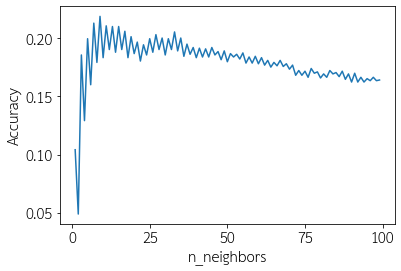

In [ ]:
''' แสดง Graph เพื่อดูว่า n_neighbors เท่าไหร่ ได้ค่า Accuracy เท่าไหร่ '''

plt.plot(content_k_neigh, content_k_score)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

# ---> แสดงค่า n_neighbors ที่ให้ค่า Accuracy สูงที่สุด
knn_max_acc = max(content_k_score)
knn_max_index = content_k_score.index(knn_max_acc)
print("Index:", knn_max_index, "Max Accuracy:", knn_max_acc)

# ---> ค่า n_neighbors index ที่ 9 หรือ ค่า n_neighbors = 9 ให้ค่า Accuracy สูงที่สุด

In [ ]:
''' สร้างโมเดล KNN หลังจากได้ค่า n_neighbors '''

knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

''' แสดง Classification Report  '''
print("Accuracy score for KNN: " ,accuracy_score(y_test, pred_knn))
print(model_report(y_test, pred_knn))

Accuracy score for KNN:  0.21885913853317812
              precision    recall  f1-score   support

  การเดินทาง       0.00      0.00      0.00        17
     กีดขวาง       0.78      0.36      0.49       203
     คนจรจัด       1.00      0.21      0.35        19
        คลอง       0.00      0.00      0.00        16
 ความปลอดภัย       0.61      0.13      0.21       354
   ความสะอาด       0.70      0.35      0.46        92
       จราจร       0.75      0.27      0.39       202
      ต้นไม้       0.97      0.40      0.56        86
         ถนน       0.85      0.40      0.55       247
     ทางเท้า       0.81      0.24      0.37       191
 ท่อระบายน้ำ       0.79      0.26      0.39        73
     น้ำท่วม       0.87      0.80      0.83       201
        ป้าย       1.00      0.31      0.47        26
   ป้ายจราจร       0.00      0.00      0.00         9
   ร้องเรียน       0.50      0.14      0.21       569
      สอบถาม       0.00      0.00      0.00        25
       สะพาน       0.00      0.00   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**แปลความจากผลลัพธ์**


---
1. Precision -> เรื่องร้องเรียนหมวดหมู่ คนจรจัด,ป้าย,สัตว์จรจัด,เสนอแนะ และเสียงรบกวน ให้ค่าสูงสุดสุด ซึ่งจำแนกถูกต้อง 100% และหมวดหมู่ การเดินทาง,คลอง,ป้ายจราจร,สอบถาม,สะพาน และห้องน้ำ ได้น้อยสุด โดยจำแนกถูกต้องที่ 0%
2. Recall ->   โมเดลมีความแม่นยำในการจำแนกเรื่องร้องเรียนหมวดหมู่แสงสว่างได้ดีที่สุด ให้ค่าสูงสุดคือ 71% และหมวดหมู่ การเดินทาง,คลอง,ป้ายจราจร,สอบถาม,สะพาน และห้องน้ำ ได้น้อยสุด โดยจำแนกถูกต้องที่ 0%

**สรุปได้ว่า โมเดล KNN สามารถจำแนกเรื่องร้องเรียนหมวดหมู่ น้ำท่วม  ได้ดีที่สุด เมื่อมองโดยภาพรวมจากค่า f1-score ที่ได้ถึง 83%**

In [ ]:
# ---> กำหนดตัวแปรเพื่อรับค่า Accuracy, Precision, Recall, F1-score เพื่อนำไปสร้าง Dataframe ต่อไป

knn_acc = (round(model_report.acc, 3))
knn_precision = (round(model_report.precision, 3))
knn_recall = (round(model_report.recall, 3))
knn_f1 = (round(model_report.f1, 3))

####3.Logistic Regression

In [ ]:
''' Logistic Regression '''
# --->set parameter
logreg = LogisticRegression(penalty='l2', C=5.0, solver='lbfgs')
# --->ค่า C ในที่นี้เป็นส่วนกลับของค่า λ ค่า C ยิ่งน้อยยิ่งเรกูลาไรซ์แรง ถ้าไม่ต้องการให้ไม่มีการเรกูลาไรซ์ก็ต้องปรับ C เป็นค่าสูงมากๆ
# --->penalty เป็นชนิดของ Regularize(การทำให้ค่าพารามิเตอร์น้ำหนักบางตัวภายในโมเดลไม่สูงมากจนเกินไป) เลือกได้ระหว่าง l1 และ l2
# --->solver จะขึ้นอยู่กับ penalty ที่เลือกซึ่ง solver='lbfgs' รองรับได้ทั้ง l1 และ l2

# --->OneVsRest แบ่งหมวดหมู่ออกเป็น 1 ต่อ หมวดหมู่อื่นๆ
logreg_classifier = OneVsRestClassifier(logreg)
logreg_classifier.fit(x_train, y_train)
pre_logreg = logreg_classifier.predict(x_test)

''' แสดง Classification Report  '''
print("Accuracy score for Logistic Regression: " ,accuracy_score(y_test, pre_logreg))
print(model_report(y_test, pre_logreg))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy score for Logistic Regression:  0.31431897555296856
              precision    recall  f1-score   support

  การเดินทาง       0.50      0.06      0.11        17
     กีดขวาง       0.74      0.51      0.61       203
     คนจรจัด       1.00      0.26      0.42        19
        คลอง       0.80      0.25      0.38        16
 ความปลอดภัย       0.78      0.60      0.68       354
   ความสะอาด       0.73      0.49      0.58        92
       จราจร       0.76      0.50      0.60       202
      ต้นไม้       0.92      0.63      0.74        86
         ถนน       0.80      0.58      0.67       247
     ทางเท้า       0.86      0.74      0.79       191
 ท่อระบายน้ำ       0.77      0.47      0.58        73
     น้ำท่วม       0.92      0.82      0.86       201
        ป้าย       0.85      0.42      0.56        26
   ป้ายจราจร       0.00      0.00      0.00         9
   ร้องเรียน       0.49      0.30      0.37       569
      สอบถาม       0.00      0.00      0.00        25
       สะพาน       1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**แปลความจากผลลัพธ์**


---
1. Precision -> เรื่องร้องเรียนหมวดหมู่ คนจรจัด,สะพาน,เสนอแนะ และเสียงรบกวน ให้ค่าสูงสุดสุด ซึ่งจำแนกถูกต้อง 100% และหมวดหมู่ป้ายจราจร,สอบถาม และห้องน้ำ ได้น้อยสุด โดยจำแนกถูกต้องที่ 0%
2. Recall ->   โมเดลมีความแม่นยำในการจำแนกเรื่องร้องเรียนหมวดหมู่แสงสว่างได้ดีที่สุด ให้ค่าสูงสุดคือ 83% และหมวดหมู่ป้ายจราจร,สอบถาม และห้องน้ำ ได้น้อยสุด โดยจำแนกถูกต้องที่ 0%

**สรุปได้ว่า โมเดล Logistic Regression สามารถจำแนกเรื่องร้องเรียนหมวดหมู่ แสงสว่าง  ได้ดีที่สุด เมื่อมองโดยภาพรวมจากค่า f1-score ที่ได้ถึง 89%**

In [ ]:
# ---> กำหนดตัวแปรเพื่อรับค่า Accuracy, Precision, Recall, F1-score เพื่อนำไปสร้าง Dataframe ต่อไป

logreg_acc = (round(model_report.acc, 3))
logreg_precision = (round(model_report.precision, 3))
logreg_recall = (round(model_report.recall, 3))
logreg_f1 = (round(model_report.f1, 3))

###สรุป

**<font color='red'>เปรียบเทียบผลลัพธ์ของแต่ละโมเดล</font>**

---

In [ ]:
''' เปรียบเทียบผลลัพธ์ของแต่ละโมเดล  '''


# ---> นำค่า Accuracy, Precision, Recall, F1-score ของแต่โมเดลมาทำเป็น Dataframe
metrics_content_data = {'Acc': [rfc_acc, knn_acc, logreg_acc],
        'Precision': [rfc_precision, knn_precision,logreg_acc],
        'Recall': [rfc_recall, knn_recall, logreg_recall],
        'F1-score': [rfc_f1, knn_f1, logreg_f1],
        'หมวดหมู่ที่จำแนกดี':['แสงสว่าง','น้ำท่วม','แสงสว่าง']
        }

metrics_content_data = pd.DataFrame(metrics_content_data, index=['Random Forest', 'KNN', 'Logistic Regression'])
metrics_content_data

# ---> จากการเปรียบเทียบแต่ละโมเดลจะเห็นได้ว่า Random Forest ให้ค่า Accuracy และ F1-score สูงสุด จึงสรุปได้ว่า Random Forest เป็นโมเดลที่มีประสิทธิภาพมากที่สุด

,Acc,Precision,Recall,F1-score,หมวดหมู่ที่จำแนกดี
Random Forest,0.319,0.592,0.356,0.421,แสงสว่าง
KNN,0.219,0.630,0.256,0.344,น้ำท่วม
Logistic Regression,0.314,0.314,0.409,0.490,แสงสว่าง


**<font color='red'>สรุปผลการวิเคราะห์</font>**

---


จากผลการเปรียบประสิทธิภาพในการนำข้อมูล Traffy Fondue มาสร้างโมเดล 3 โมเดลคือ  Random Forest  KNN และ Logistic Regression พบว่าเป็นโมเดล Random Forest เป็นที่มีประสิทธิภาพมากที่สุด โดยสามารถจำแนกเรื่องร้องเรียนในหมวดหมู่แสงสว่างได้ดีที่สุด